Import Depandacies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the CSV file

In [2]:
df = pd.read_csv("covid-19.csv")

Observe the information in the Dataset

In [3]:
df.head()

,Date,Cured,Deaths,Confirmed
0,3/2/2020,0.0,0.0,1.0
1,3/3/2020,0.0,0.0,1.0
2,3/4/2020,0.0,0.0,1.0
3,3/5/2020,0.0,0.0,2.0
4,3/6/2020,0.0,0.0,3.0


In [4]:
df.describe()

,Cured,Deaths,Confirmed
count,7.410000e+02,741.000000,7.410000e+02
mean,7.763974e+05,13926.642664,8.023839e+05
std,5.784675e+05,9951.520111,5.849880e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,1.585860e+05,4481.000000,1.795690e+05
50%,6.281170e+05,10919.000000,6.408150e+05
75%,1.412858e+06,25114.107140,1.438441e+06
max,1.423323e+06,25411.428570,1.448894e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       741 non-null    object 
 1   Cured      741 non-null    float64
 2   Deaths     741 non-null    float64
 3   Confirmed  741 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.3+ KB


Check for Null values

In [7]:
df.isnull().sum()

Date         0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

Check the Shape of the Dataset

In [9]:
df.shape

(741, 4)

Compute the correlation of the Dataset

In [8]:
df.corr()

C:\Users\Oloye\AppData\Local\Temp\ipykernel_8012\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Cured,Deaths,Confirmed
Cured,1.000000,0.997435,0.999476
Deaths,0.997435,1.000000,0.995938
Confirmed,0.999476,0.995938,1.000000


Set the Date Column as the index

In [10]:
df.set_index("Date", inplace=True)

In [11]:
df.head()

,Cured,Deaths,Confirmed
Date,,,
3/2/2020,0.0,0.0,1.0
3/3/2020,0.0,0.0,1.0
3/4/2020,0.0,0.0,1.0
3/5/2020,0.0,0.0,2.0
3/6/2020,0.0,0.0,3.0


In [12]:
df.isnull().any()

Cured        False
Deaths       False
Confirmed    False
dtype: bool

Visualization of the Dataset

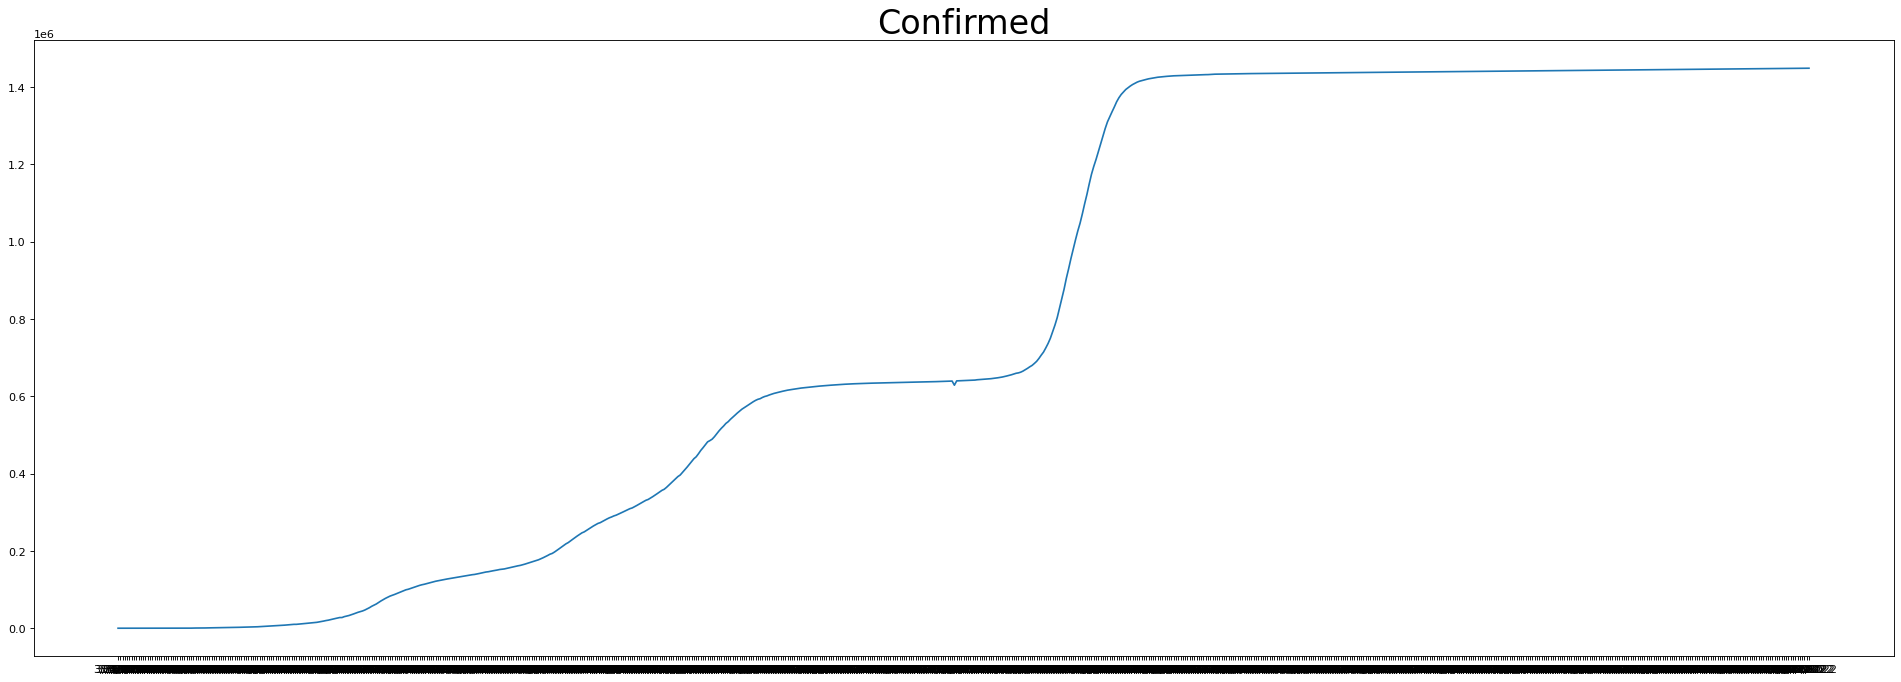

In [13]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor="w", edgecolor='k')
plt.title("Confirmed", fontsize=30)
plt.plot(df.Confirmed)


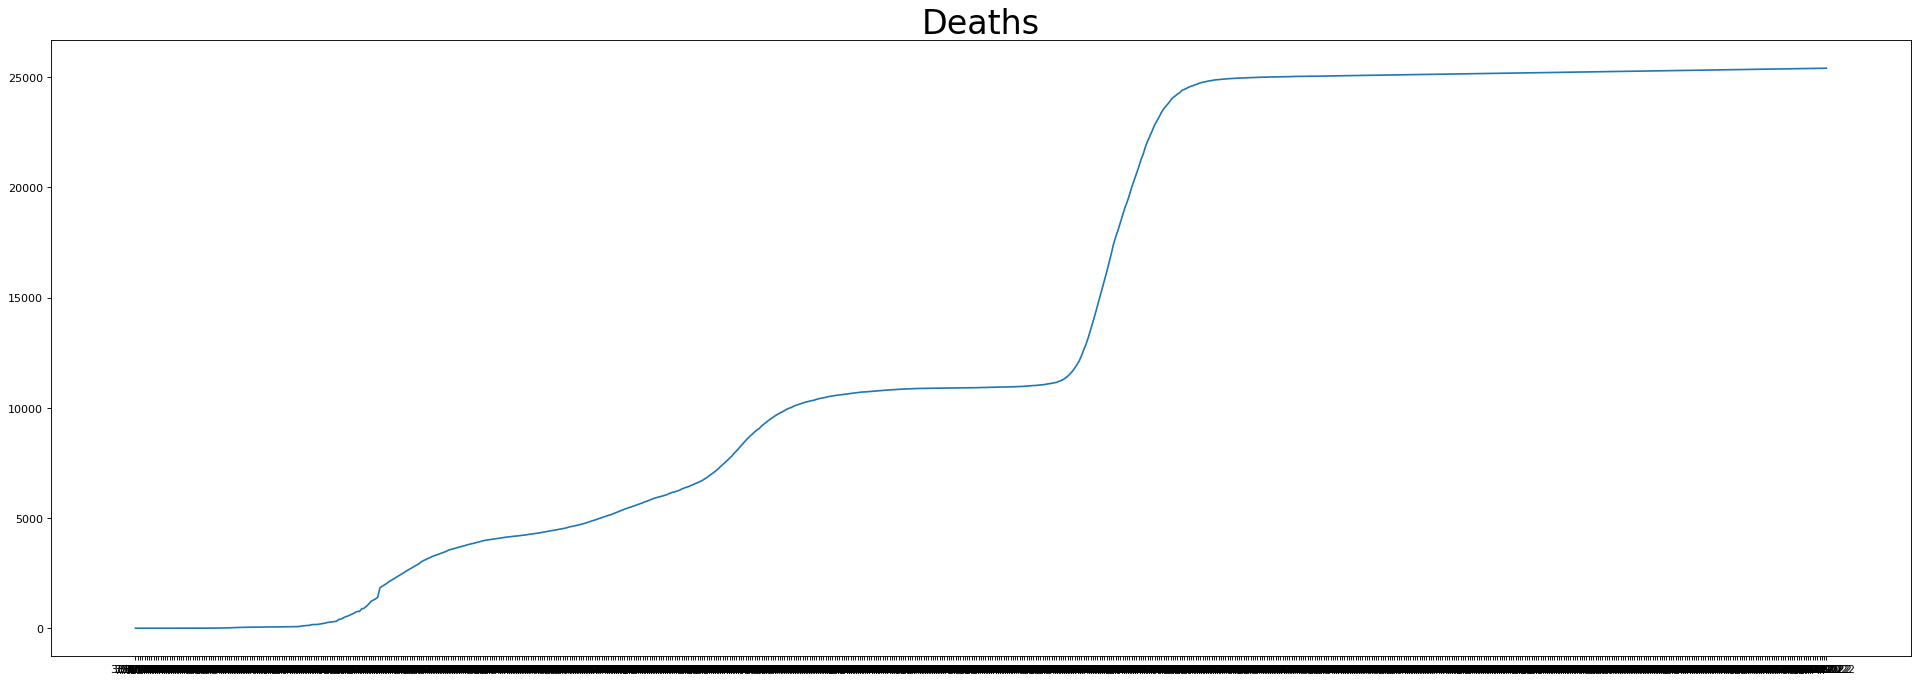

In [15]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor="w", edgecolor='k')
plt.title("Deaths", fontsize=30)
plt.plot(df.Deaths)

Visualize the Ralation of Dataset

Text(0.5, 0, 'Years')

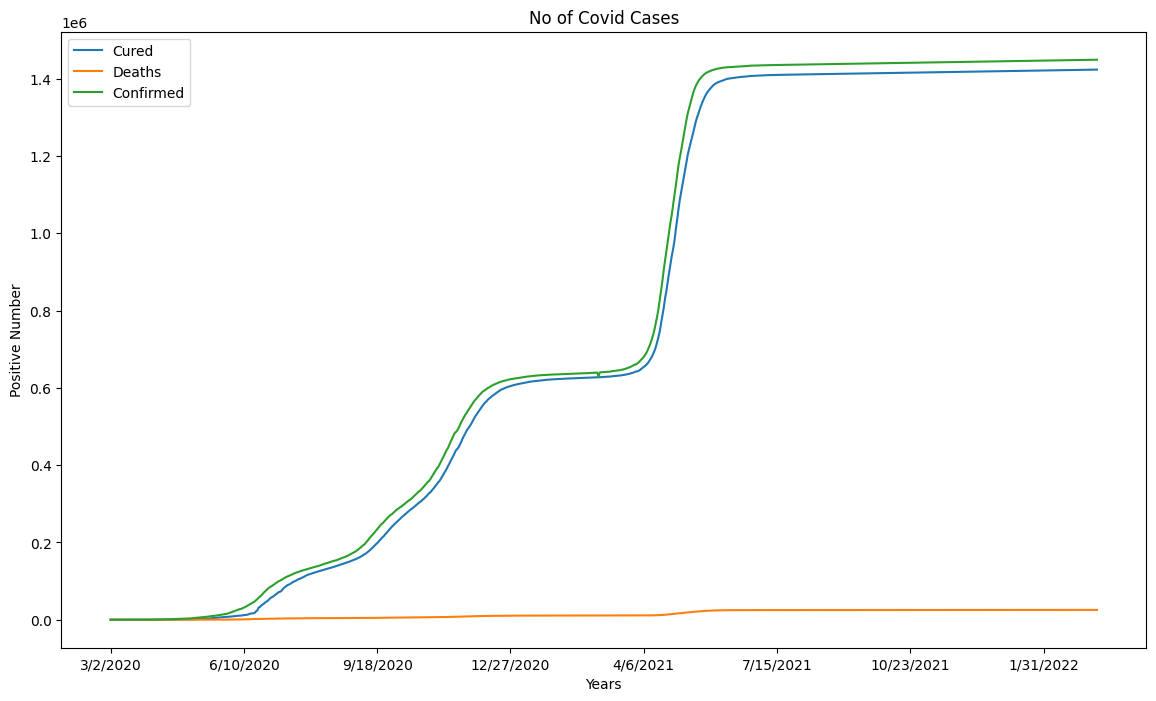

In [16]:
df.plot(kind="line", figsize=(14,8))


plt.title("No of Covid Cases")
plt.ylabel("Positive Number")
plt.xlabel("Years")

Area plot on Dataset

Text(0.5, 0, 'years')

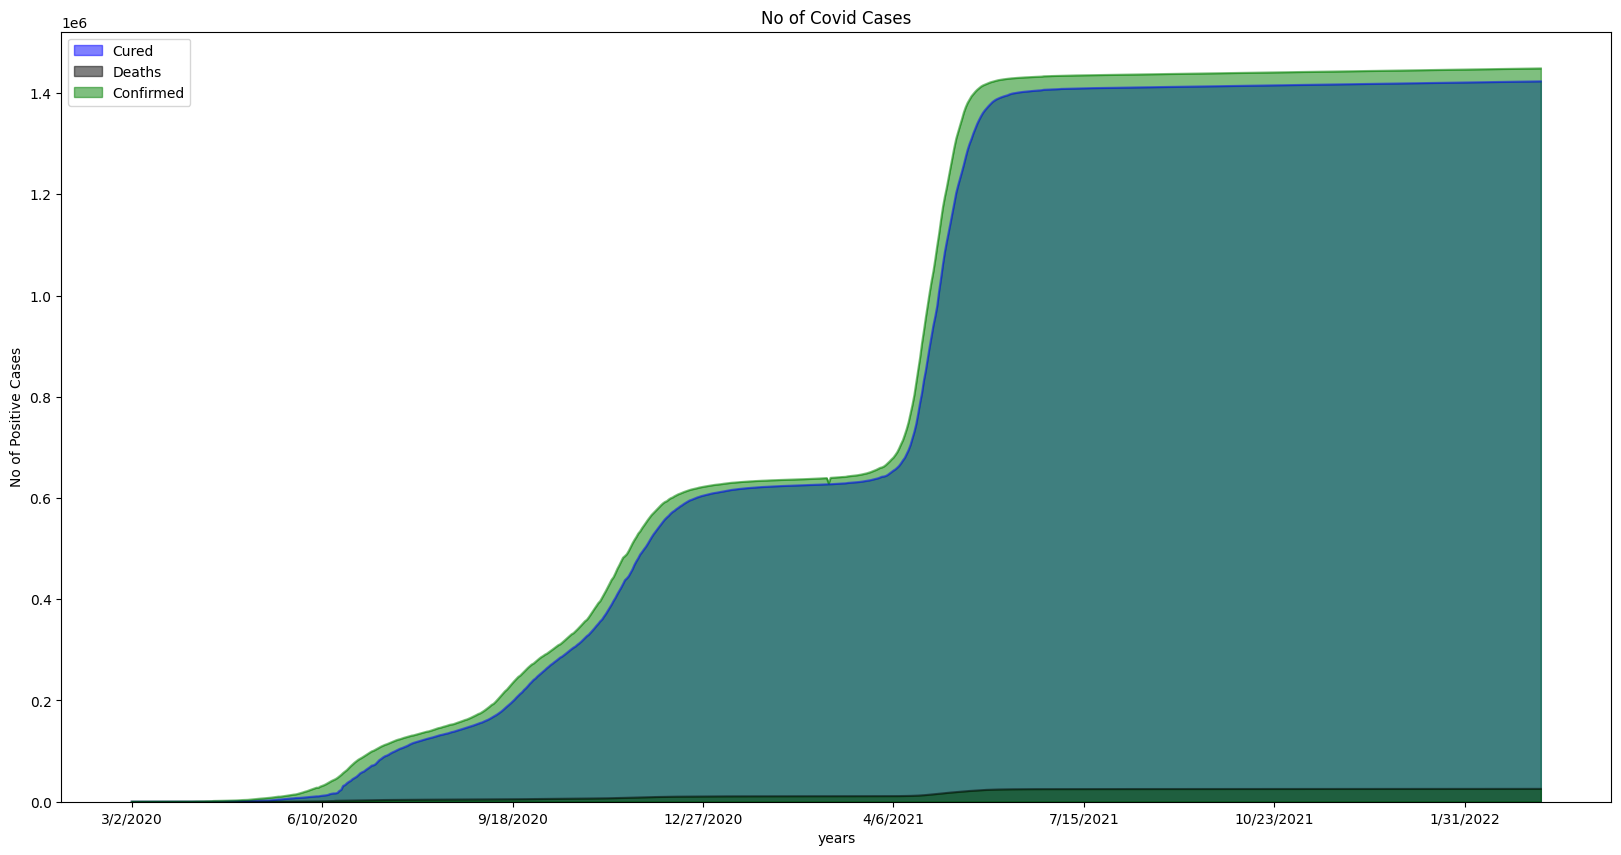

In [18]:
df.plot(kind="area", stacked=False, figsize=(20,10), color= ['b','k','g'])
plt.title("No of Covid Cases")
plt.ylabel("No of Positive Cases")
plt.xlabel("years")

Plot Autocorrelation, Mean over time and Standard Deviation

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Mean Over Time')

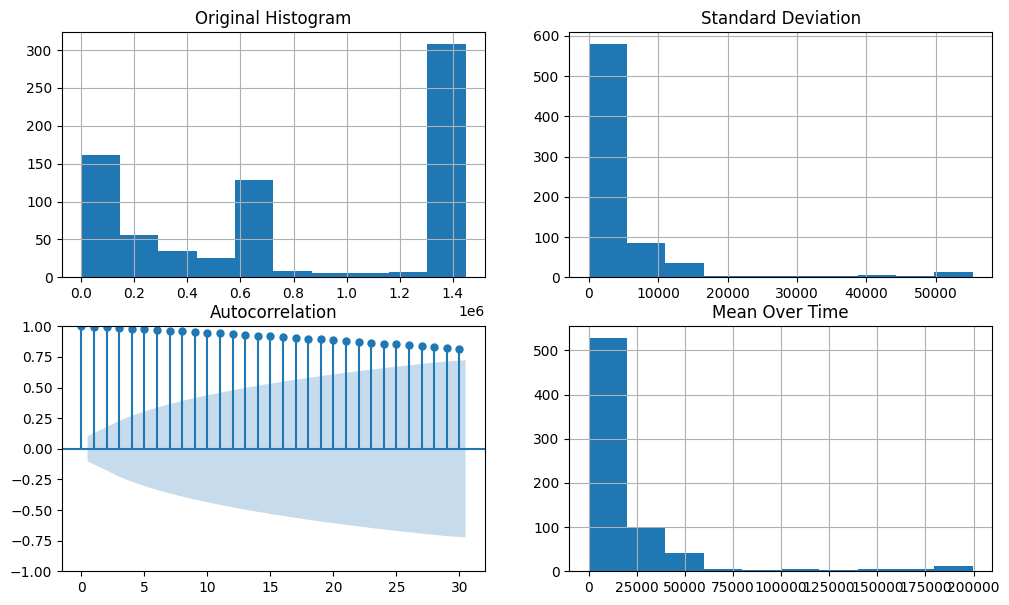

In [20]:
fig = plt.figure(figsize=(12,7))
layout = (2,2)

hist_ax = plt.subplot2grid(layout, (0,0))
ac_ax = plt.subplot2grid(layout, (1,0))
hist_std_ax = plt.subplot2grid(layout, (0,1))
mean_ax = plt.subplot2grid(layout, (1,1))

df.Confirmed.hist(ax=hist_ax)
hist_ax.set_title("Original Histogram")

series = df.Confirmed[:365]
plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm=df.Confirmed.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard Deviation")


mn=df.Confirmed.rolling(30).std()
mn.hist(ax=mean_ax)
mean_ax.set_title("Mean Over Time")



Stationary Check

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
x = df.Confirmed.values

In [23]:
result = adfuller(x)



In [25]:
print("ADF statistics:%f"% result[0])
print("p-values:%f"% result[1])
print("Critical Values")
for key, value in result[4].items():
    print("\t%s: %.3f"%(key,value))

ADF statistics:-0.981659
p-values:0.759895
Critical Values
	1%: -3.439
	5%: -2.866
	10%: -2.569


Make the values stationary since the p-value is greater than 0.5

In [26]:
df_log = np.sqrt(df['Confirmed'])
df_diff = df_log.diff().fillna(0)

df["Confirmed"] = df_diff

In [27]:
x = df.Confirmed.values
result = adfuller(x)

print("ADF statistics:%f"% result[0])
print("p-values:%f"% result[1])
print("Critical Values")
for key, value in result[4].items():
    print("\t%s: %.3f"%(key,value))

ADF statistics:-3.661809
p-values:0.004684
Critical Values
	1%: -3.439
	5%: -2.866
	10%: -2.569


Apply MAchine Learning Models for Forcasting

ARIMA model

In [28]:
from statsmodels.tsa.arima.model import ARIMA

Convert the date to datetime dtype

In [32]:
df.index = pd.DatetimeIndex(df.index)

In [33]:
df.index.dtype

dtype('<M8[ns]')

In [34]:
df.head()

,Cured,Deaths,Confirmed
Date,,,
2020-03-02,0.0,0.0,0.000000
2020-03-03,0.0,0.0,0.000000
2020-03-04,0.0,0.0,0.000000
2020-03-05,0.0,0.0,0.414214
2020-03-06,0.0,0.0,0.317837


In [35]:
order = [1,1,1]

model = ARIMA(df["Confirmed"], order=order)
model_fit = model.fit()

c:\Users\Oloye\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  741
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -899.376
Date:                Sun, 02 Jul 2023   AIC                           1804.751
Time:                        08:28:13   BIC                           1818.571
Sample:                    03-02-2020   HQIC                          1810.080
                         - 03-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2761      0.036     -7.670      0.000      -0.347      -0.206
ma.L1         -0.3543      0.035    -10.173      0.000      -0.423      -0.286
sigma2         0.6652      0.012     56.543      0.000       0.642       0.688
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             38127.79
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Check for Duplicate index

In [37]:
df = df[~df.index.duplicated()]

In [38]:
df

,Cured,Deaths,Confirmed
Date,,,
2020-03-02,0.000,0.00000,0.000000
2020-03-03,0.000,0.00000,0.000000
2020-03-04,0.000,0.00000,0.000000
2020-03-05,0.000,0.00000,0.414214
2020-03-06,0.000,0.00000,0.317837
...,...,...,...
2022-03-08,1423097.143,25405.00000,0.023471
2022-03-09,1423153.714,25406.60714,0.023471
2022-03-10,1423210.286,25408.21429,0.023470


<Axes: xlabel='Date'>

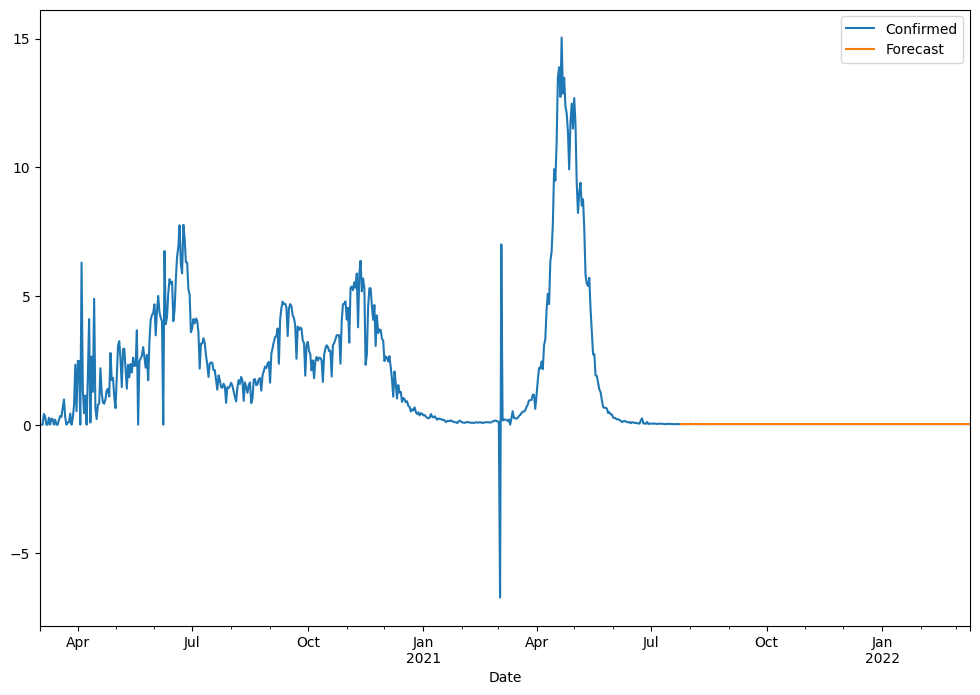

In [39]:
df["Forecast"] = model_fit.predict(start=510, end=760, dynamic=True)
df[["Confirmed", "Forecast"]].plot(figsize=(12,8))

SARIMA Model

In [43]:
import statsmodels.api as sm

In [44]:
seasonal_order = [1,1,1,12]
model =  sm.tsa.statespace.SARIMAX(df["Confirmed"], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

model_fit.summary()

c:\Users\Oloye\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Confirmed   No. Observations:                  741
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -908.657
Date:                            Sun, 02 Jul 2023   AIC                           1827.315
Time:                                    08:37:44   BIC                           1850.266
Sample:                                03-02-2020   HQIC                          1836.171
                                     - 03-12-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2743      0.042     -6.549      0.000      -0.356      -0.192
ma.L1         -0.3502      0.040     -8.669      0.000      -0.429      -0.271
ar.S.L12      -0.0274      0.031     -0.881      0.378      -0.088       0.034
ma.S.L12      -0.9991      0.966     -1.035      0.301      -2.892       0.893
sigma2         0.6637      0.634      1.047      0.295      -0.578       1.906
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             30691.84
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

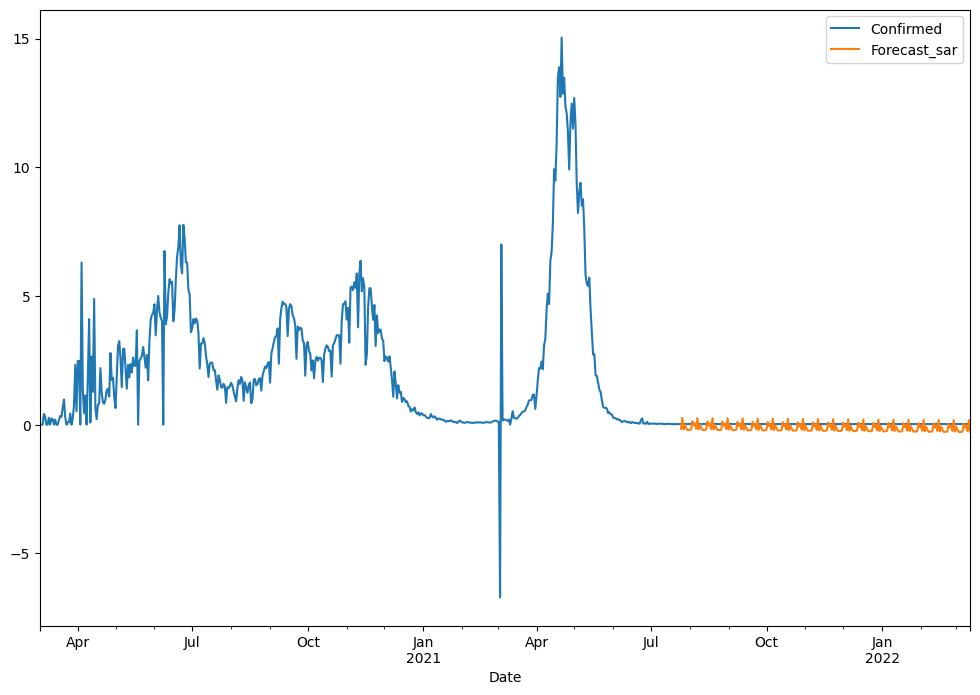

In [45]:
df["Forecast_sar"] = model_fit.predict(start=510, end=760, dynamic=True)
df[["Confirmed", "Forecast_sar"]].plot(figsize=(12,8))

Future prediction

In [46]:
from pandas.tseries.offsets import DateOffset

In [47]:
future_date = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [50]:
future_df = pd.DataFrame(index=future_date[1:], columns=df.columns)

new_df = pd.concat([df, future_df])

<Axes: >

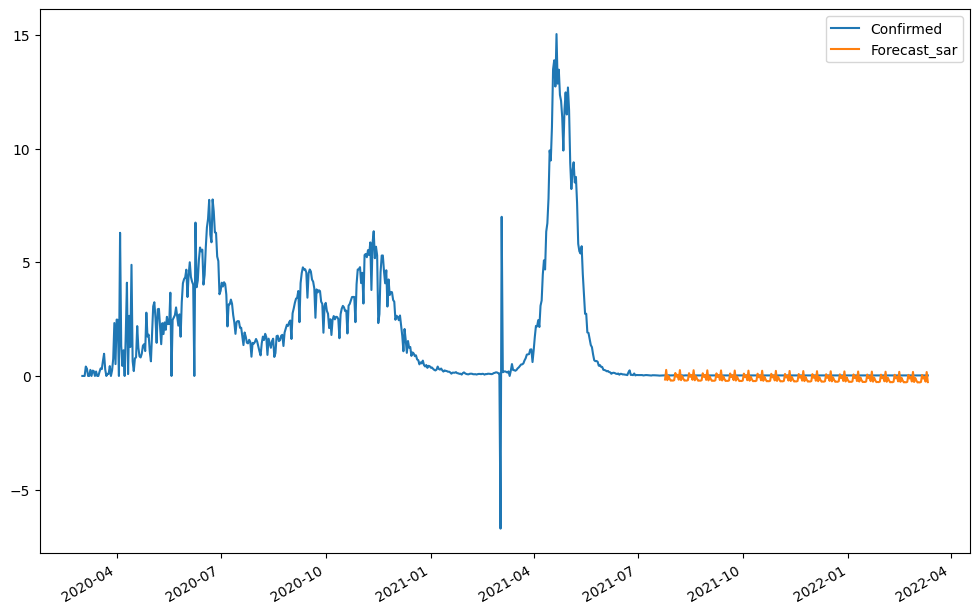

In [52]:
new_df["Forecast_sar"]= model_fit.predict(start=510, end=760, dynamic=True)
new_df[["Confirmed", "Forecast_sar"]].plot(figsize=(12,8))